Name: Allyson Busch

Course: DSC 680

Professor: Catie Williams

# Goodreads: Building a Book Recommendation System

The Kaggle data set can be found at: https://www.kaggle.com/zygmunt/goodbooks-10k and contains information on ten thousand books with one million ratings as well as books marked to be read and tags. The goal of this study is to create a book recommendation system, but we are starting with importing the libraries, importing the data, and Exploratory Data Analysis.

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly as py
import matplotlib.pyplot as plt

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [4]:
# importing the data

book_tags = pd.read_csv('book_tags.csv')
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
to_read = pd.read_csv('to_read.csv')

## Exploratory Data Analysis

Before getting into the analysis, I want to look into the datasets to evaluate the information I have. I am starting this by looking into what the first five of the books dataset contains as well as verifying the shape (count) of the dataset.

In [5]:
books.head(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
books.shape

(10000, 23)

The books.csv contains twenty three columns (variables) and has 10,000 rows (or 10,000 books) which was to be expected when importing from Kaggle.

In [7]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


Looking into this, every book has at least 3 text reviews, and everything has more than one rating. The minimum rating is a 2.47 while the maximum rating is a 4.82. The average rating is a 4.02 with a standard deviation of .25. 

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
id                           10000 non-null int64
book_id                      10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
books_count                  10000 non-null int64
isbn                         9300 non-null object
isbn13                       9415 non-null float64
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               9415 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 n

In [9]:
books.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

None of the null values are concerning fields, as the author, title, and ratings contain no null values.

### Correlation

In [10]:
books.corr()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
id,1.000000,0.115154,0.104516,0.113861,-0.263841,-0.011291,0.049875,-0.040880,-0.373178,-0.382656,-0.419292,-0.239401,-0.345764,-0.413279,-0.407079,-0.332486
book_id,0.115154,1.000000,0.966620,0.929356,-0.164578,-0.048246,0.133790,-0.024848,-0.073023,-0.063760,0.118845,-0.038375,-0.056571,-0.075634,-0.063310,-0.056145
best_book_id,0.104516,0.966620,1.000000,0.899258,-0.159240,-0.047253,0.131442,-0.021187,-0.069182,-0.055835,0.125893,-0.033894,-0.049284,-0.067014,-0.054462,-0.049524
work_id,0.113861,0.929356,0.899258,1.000000,-0.109436,-0.039320,0.107972,-0.017555,-0.062720,-0.054712,0.096985,-0.034590,-0.051367,-0.066746,-0.054775,-0.046745
books_count,-0.263841,-0.164578,-0.159240,-0.109436,1.000000,0.017865,-0.321753,-0.069888,0.324235,0.333664,0.198698,0.225763,0.334923,0.383699,0.349564,0.279559
isbn13,-0.011291,-0.048246,-0.047253,-0.039320,0.017865,1.000000,-0.004612,-0.025667,0.008904,0.009166,0.009553,0.006054,0.010345,0.012142,0.010161,0.006622
original_publication_year,0.049875,0.133790,0.131442,0.107972,-0.321753,-0.004612,1.000000,0.015608,-0.024415,-0.025448,0.027784,-0.019635,-0.038472,-0.042459,-0.025785,-0.015388
average_rating,-0.040880,-0.024848,-0.021187,-0.017555,-0.069888,-0.025667,0.015608,1.000000,0.044990,0.045042,0.007481,-0.077997,-0.115875,-0.065237,0.036108,0.115412
ratings_count,-0.373178,-0.073023,-0.069182,-0.062720,0.324235,0.008904,-0.024415,0.044990,1.000000,0.995068,0.779635,0.723144,0.845949,0.935193,0.978869,0.964046
work_ratings_count,-0.382656,-0.063760,-0.055835,-0.054712,0.333664,0.009166,-0.025448,0.045042,0.995068,1.000000,0.807009,0.718718,0.848581,0.941182,0.987764,0.966587


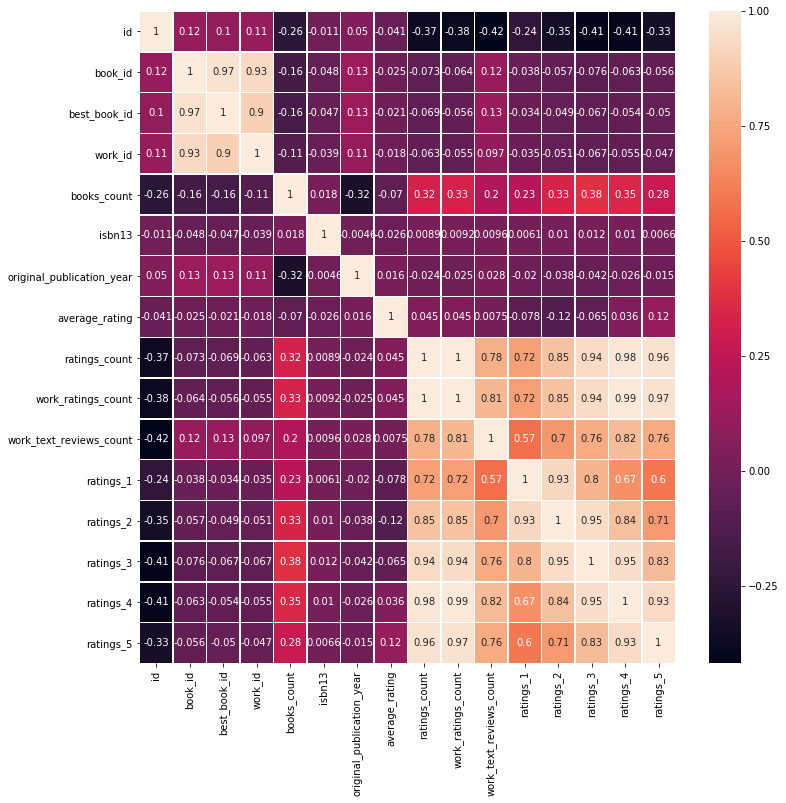

In [15]:
# creating a correlation map

f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(books.corr(), annot=True, linewidths=0.5)
plt.show()

Looking at the heatmap produced from the correlations, the strongest correlations from just a glance are between the different ratings categories, which makes sense. The average rating, however, doesn't correlate to the ratings in each category. Additionally, publication year doesn't actively correlate to any of the other variables, either.

### Ratings

So far we've only focused on the books.csv so I wanted to go into the other csv files. Starting with the ratings.csv, I am just looking at what is included in the file.

In [16]:
ratings.head(5)

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
book_id    981756 non-null int64
user_id    981756 non-null int64
rating     981756 non-null int64
dtypes: int64(3)
memory usage: 22.5 MB


In [18]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [19]:
ratings.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

The data set doesn't contain any null values, and there doesn't appear to be any outliers in the ratings of extreme values. 

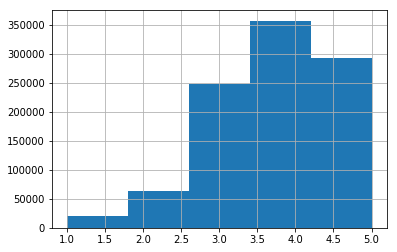

In [26]:
ratings.rating.hist(bins=5)

Four is the most popular ratings, and there are very few ones or twos.

### Tags 

Looking into the tags dataset next, I started with just looking at what was included in the data.

In [20]:
tags.head(5)

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [36]:
tags.tail(5)

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [21]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
tag_id      34252 non-null int64
tag_name    34252 non-null object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [22]:
tags.describe()

,tag_id
count,34252.000000
mean,17125.500000
std,9887.845047
min,0.000000
25%,8562.750000
50%,17125.500000
75%,25688.250000
max,34251.000000


In [23]:
book_tags.head(5)

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [24]:
book_tags.describe()

,goodreads_book_id,tag_id,count
count,9.999120e+05,999912.000000,999912.000000
mean,5.263442e+06,16324.527073,208.869633
std,7.574057e+06,9647.846196,3501.265173
min,1.000000e+00,0.000000,-1.000000
25%,4.622700e+04,8067.000000,7.000000
50%,3.948410e+05,15808.000000,15.000000
75%,9.378297e+06,24997.000000,40.000000
max,3.328864e+07,34251.000000,596234.000000


### Reviews Per Book

In [27]:
reviews_per_book = ratings.groupby('book_id').book_id.apply(lambda x: len(x))
reviews_per_book.describe()

count    10000.000000
mean        98.175600
std          5.690167
min          8.000000
25%         99.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: book_id, dtype: float64

In [28]:
reviews_per_book.sort_values().head(15)

book_id
7803     8
9345    11
9486    24
1935    34
9315    36
9553    41
8181    44
9260    46
9479    47
9705    48
9918    52
8971    52
9249    52
9769    53
9307    53
Name: book_id, dtype: int64

The majority of books have 100 reviews, but there are several that have much lower, with one having as few as 8 reviews.

### Reviews Per User

In [31]:
reviews_per_user = ratings.groupby('user_id').user_id.apply(lambda x: len(x))
reviews_per_user.describe()

count    53424.000000
mean        18.376685
std         26.268690
min          2.000000
25%          3.000000
50%          8.000000
75%         22.000000
max        200.000000
Name: user_id, dtype: float64

In [32]:
reviews_per_user.sort_values(ascending = False).head(15)

user_id
12874    200
30944    200
52036    199
12381    199
28158    199
45554    197
6630     197
37834    197
9668     196
19729    196
7563     196
15604    196
14372    196
24143    196
9806     196
Name: user_id, dtype: int64

All users have at least two reviews, with a mean of 18 reviews. The maximum amount of reviews that any one user has is 200. 

## Model Creation

I am creating both a content based recommendation system and a collaborative filtering recommendation system to compare. I am starting with the content based recommendation system.

### Content Based Recommendation System

#### Author Based

First, I want to build the content based book recommendation system. I am starting with looking at the books dataset again.

In [48]:
books.head(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


Next, I am using TfidVectorizer from scikit-learn to transform text to feature vectors that can be used as input. I am using this on the authors from the books dataset.

In [40]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range=(1,2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(books['authors'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

I am using cosine similarity to calculate a number that explains the similarity between two books.

In [41]:
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Now I can get into the model construction, starting with building an array with book titles.

In [43]:
titles = books['title']
indices = pd.Series(books.index, index = books['title'])

The following function is the book recommendation system that is based on the cosine similarity calculated on the book authors.

In [58]:
def author_rec(title):
    idx = indices[title]
    s_scores = list(enumerate(cosine_sim[idx]))
    s_scores = sorted(s_scores, key = lambda x: x[1], reverse = True)
    s_scores = s_scores[1:21]
    book_indices = [i[0] for i in s_scores]
    return titles.iloc[book_indices]

In [59]:
author_rec('To Kill a Mockingbird').head(10)

532                                  Go Set a Watchman
9887                                   The Last Boleyn
7239                          The Dry (Aaron Falk, #1)
6492                         Axel (Corps Security, #1)
8393                         Cage (Corps Security, #2)
9361    Nice Girls Don't Have Fangs (Jane Jameson, #1)
476                   Killing Floor (Jack Reacher, #1)
1357                       One Shot (Jack Reacher, #9)
1423                     Die Trying (Jack Reacher, #2)
1599                      Tripwire  (Jack Reacher, #3)
Name: title, dtype: object

The system above recommendations books based on the cosine similarity calculated on the authors of books. The example test was To Kill a Mockingbird, which produced the results above. The next recommendation system I want to build will use the tags provided in the dataset. I am starting with merging the book_tags dataset with the tags dataset.

#### Tag Based

In [49]:
joining_tags = pd.merge(book_tags, tags, left_on = 'tag_id', right_on = 'tag_id', how = 'inner')
joining_tags.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


I am then combining books with the dataset I created above.

In [51]:
books_and_tags = pd.merge(books, joining_tags, left_on='book_id', right_on='goodreads_book_id', how = 'inner')

I am using the same process as above to create a cosine value.

In [52]:
tf_1 = TfidfVectorizer(analyzer='word', ngram_range=(1,2), min_df = 0, stop_words='english')
tfidf_matrix_1 = tf_1.fit_transform(books_and_tags['tag_name'].head(10000))
cosine_sim_1 = linear_kernel(tfidf_matrix_1, tfidf_matrix_1)

In [53]:
cosine_sim_1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

As with the previous process, I am now creating an array with the book titles and then creating a function to get book recommendations that are based on the cosine similarity value of the book tags.

In [55]:
titles_1 = books['title']
indices_1 = pd.Series(books.index, index=books['title'])

In [56]:
def tag_rec(title):
    idx = indices_1[title]
    s_scores = list(enumerate(cosine_sim_1[idx]))
    s_scores = sorted(s_scores, key = lambda x: x[1], reverse = True)
    s_scores = s_scores[1:21]
    book_indices = [i[0] for i in s_scores]
    return titles.iloc[book_indices]

In [57]:
tag_rec('To Kill a Mockingbird').head(10)

103                                      The Road
203                             A Christmas Carol
302                   The Secret (The Secret, #1)
402                                The Art of War
502     2001: A Space Odyssey (Space Odyssey, #1)
603                             Girl, Interrupted
702                                  Bag of Bones
803                                   The Tempest
1002                                      Contact
1103                      Grey (Fifty Shades, #4)
Name: title, dtype: object

As you can see when comparing the recommendations from the author based model, it produced different results as recommendations. The previous model produced several results that are by one author, specifically series, whereas this model has a more diverse array of authors. I now want to build a recommendation system that combines authors and tags to create a better recommendation. 

#### Authors and Tags Based

I am starting by grouping the books_and_tags dataset together differently. and then merging it with the books dataset.

In [60]:
temporary_data = books_and_tags.groupby('book_id')['tag_name'].apply(' '.join).reset_index()
temporary_data.head(10)

,book_id,tag_name
0,1,to-read fantasy favorites currently-reading yo...
1,2,to-read fantasy favorites currently-reading yo...
2,3,to-read fantasy favorites currently-reading yo...
3,5,to-read fantasy favorites currently-reading yo...
4,6,to-read fantasy young-adult fiction harry-pott...
5,8,to-read fantasy favorites currently-reading yo...
6,10,to-read fantasy favorites currently-reading yo...
7,11,to-read fantasy favorites currently-reading yo...
8,13,to-read fantasy favorites currently-reading yo...
9,21,to-read favorites currently-reading fiction bo...


In [61]:
books_rec = pd.merge(books, temporary_data, left_on = 'book_id', right_on='book_id', how= 'inner')

In [88]:
books_rec.head(10)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name,comp
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,to-read fantasy favorites currently-reading yo...,Suzanne Collins to-read fantasy favorites curr...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,to-read fantasy favorites currently-reading yo...,"J.K. Rowling, Mary GrandPré to-read fantasy fa..."
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,to-read fantasy favorites currently-reading yo...,Stephenie Meyer to-read fantasy favorites curr...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,to-read favorites currently-reading young-adul...,Harper Lee to-read favorites currently-reading...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,to-read favorites currently-reading young-adul...,F. Scott Fitzgerald to-read favorites currentl...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...,to-read favorites currently-reading young-adul...,John Green to-read favorites currently-reading...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...,to-read fantasy favorites currently-reading yo...,J.R.R. Tolkien to-read fantasy favorites curre...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...,to-read favorites currently-reading young-adul...,J.D. Salinger to-read favorites currently-read...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...,to-read fantasy favorites currently-reading fi...,Dan Brown to-read fantasy favorites currently-...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...,to-read favorites young-adult fiction books-i-...,Jane Austen to-read favorites young-adult fict...


I am now creating a compilation (comp) of the features. After this I will calculate the TF-IDF of the attributes to get a (hopefully) better recommendation system.

In [66]:
books_rec['comp'] = (pd.Series(books_rec[['authors', 'tag_name']]
                          .fillna('')
                          .values.tolist()
                          ).str.join(' '))

In [67]:
tf_full = TfidfVectorizer(analyzer='word', ngram_range = (1,2), min_df = 0, stop_words ='english')
tfidf_matrix_full = tf_full.fit_transform(books_rec['comp'])
cosine_sim_full = linear_kernel(tfidf_matrix_full, tfidf_matrix_full)

In [69]:
titles = books_rec['title']
indices_2 = pd.Series(books_rec.index, index=books_rec['title'])

In [70]:
def full_rec(title):
    idx = indices_2[title]
    s_scores = list(enumerate(cosine_sim_full[idx]))
    s_scores = sorted(s_scores, key = lambda x: x[1], reverse = True)
    s_scores = s_scores[1:21]
    book_indices = [i[0] for i in s_scores]
    return titles.iloc[book_indices]

In [72]:
full_rec('To Kill a Mockingbird').head(10)

7                  The Catcher in the Rye
4                        The Great Gatsby
31                        Of Mice and Men
27                      Lord of the Flies
130                   The Grapes of Wrath
129               The Old Man and the Sea
781                         The Awakening
467          Their Eyes Were Watching God
57     The Adventures of Huckleberry Finn
128       One Flew Over the Cuckoo's Nest
Name: title, dtype: object

While it is hard to tell if the recommendations are more likely to be something that somoene would read who also enjoys To Kill a Mockingbird, it does appear to produce novels that are similar in tone, length, and are also frequently read in high school english classes.

In [75]:
full_rec('The Hobbit')

188     The Lord of the Rings (The Lord of the Rings, ...
154            The Two Towers (The Lord of the Rings, #2)
160     The Return of the King (The Lord of the Rings,...
18      The Fellowship of the Ring (The Lord of the Ri...
610              The Silmarillion (Middle-Earth Universe)
4975         Unfinished Tales of Númenor and Middle-Earth
2308                                The Children of Húrin
963     J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...
465                             The Hobbit: Graphic Novel
8271                   The Complete Guide to Middle-Earth
1366    The Once and Future King (The Once and Future ...
1321              The Last Unicorn (The Last Unicorn, #1)
53      The Hitchhiker's Guide to the Galaxy (Hitchhik...
367             The Subtle Knife (His Dark Materials, #2)
61            The Golden Compass (His Dark Materials, #1)
479           The Amber Spyglass (His Dark Materials, #3)
936          His Dark Materials (His Dark Materials #1-3)
331      The M

Testing the recommendation with another popular novel, it seems to also return High Fantasy novels, many of which are by the same author and in the same genre.

### Collaborative Filtering Recommendation System

I am starting with building a sparse matrix for books and users.

In [76]:
from scipy.sparse import coo_matrix

In [78]:
matrix = coo_matrix((ratings['rating'].astype(float),
                    (ratings['book_id'], ratings['user_id'])))
print(matrix)

  (1, 314)	5.0
  (1, 439)	3.0
  (1, 588)	5.0
  (1, 1169)	4.0
  (1, 1185)	4.0
  (1, 2077)	4.0
  (1, 2487)	4.0
  (1, 2900)	5.0
  (1, 3662)	4.0
  (1, 3922)	5.0
  (1, 5379)	5.0
  (1, 5461)	3.0
  (1, 5885)	5.0
  (1, 6630)	5.0
  (1, 7563)	3.0
  (1, 9246)	1.0
  (1, 10140)	4.0
  (1, 10146)	5.0
  (1, 10246)	4.0
  (1, 10335)	4.0
  (1, 10610)	5.0
  (1, 10944)	5.0
  (1, 11854)	4.0
  (1, 11927)	4.0
  (1, 12471)	5.0
  :	:
  (10000, 37777)	5.0
  (10000, 38663)	4.0
  (10000, 39251)	4.0
  (10000, 39997)	4.0
  (10000, 42257)	5.0
  (10000, 42537)	4.0
  (10000, 42810)	3.0
  (10000, 43068)	3.0
  (10000, 43318)	4.0
  (10000, 43319)	5.0
  (10000, 43744)	4.0
  (10000, 44206)	4.0
  (10000, 44655)	3.0
  (10000, 44889)	4.0
  (10000, 46337)	5.0
  (10000, 47069)	4.0
  (10000, 47326)	3.0
  (10000, 47515)	4.0
  (10000, 48201)	5.0
  (10000, 48281)	4.0
  (10000, 48386)	5.0
  (10000, 49007)	4.0
  (10000, 49383)	5.0
  (10000, 50124)	5.0
  (10000, 51328)	1.0


I am now using SVD (Singular Value Decomposition) on the sparse matrix I created. 

In [80]:
from sklearn.decomposition import TruncatedSVD

In [82]:
svd = TruncatedSVD(n_components = 2000, n_iter = 10, random_state = 23)
sigma = svd.fit_transform(matrix)
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(sigma.shape)

[0.00774261 0.00342315 0.00406367 ... 0.00012635 0.00012628 0.00012621]
0.5716303993829324
(10001, 2000)


The matrix created has a shape of (10001,200) and every row is a represented feature vector of a book. I am now going to create similarities for every book using cosine similarity.

In [83]:
from sklearn.metrics.pairwise import cosine_similarity

In [84]:
df = pd.DataFrame(cosine_similarity(sigma))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,1.000000,0.184431,0.186567,0.191429,0.127374,0.149868,0.085234,0.107562,0.148448,0.140447,...,0.002665,-0.026951,-0.013661,-0.043326,-0.057000,0.110424,-0.002762,-0.017754,-0.010856,-0.024829
1,0.184431,1.000000,0.653566,0.604738,0.555059,0.573728,0.306774,0.500669,0.476754,0.576653,...,0.018074,-0.003581,0.004660,0.000217,0.016205,-0.000029,0.002547,0.000703,-0.000668,0.008048
2,0.186567,0.653566,1.000000,0.599797,0.714114,0.700147,0.201772,0.676989,0.593163,0.614667,...,0.010831,0.006798,-0.005394,0.000191,0.018183,0.002648,-0.002565,-0.001626,-0.004395,0.012878
3,0.191429,0.604738,0.599797,1.000000,0.438341,0.434718,0.356972,0.441128,0.570992,0.447850,...,0.016980,0.002504,-0.002089,0.000337,-0.001310,0.001515,0.000996,-0.001917,-0.002802,0.008698
4,0.127374,0.555059,0.714114,0.438341,1.000000,0.817680,0.144365,0.624983,0.733660,0.560850,...,0.028940,0.000149,-0.007943,-0.001194,0.036656,0.001065,-0.000311,-0.000605,0.000760,0.000696


Now that the similarities have been created, we can search similar books as long as we have the book_id.

In [85]:
associated_books = df.iloc[2657].sort_values(ascending = False)

list = []
for idx in associated_books.index[:100]:
    res = books.loc[books['book_id'] == idx]
    if not res.empty:
        print(res[['title', 'authors']])

                   title     authors
3  To Kill a Mockingbird  Harper Lee
                           title                     authors
6297  The Poetry of Pablo Neruda  Pablo Neruda, Ilan Stavans
                                  title            authors
2073  The Body Farm (Kay Scarpetta, #5)  Patricia Cornwell
       title                    authors
372  The BFG  Roald Dahl, Quentin Blake
                 title       authors
918  The Shipping News  Annie Proulx
           title        authors
488  The Prophet  Kahlil Gibran


Obviously these results are a bit different than the previous model, and I feel like they don't match as well as the other model. Let's test it on a different book.

In [90]:
hobbit_books = df.iloc[5907].sort_values(ascending = False)

list = []
for idx in hobbit_books.index[:100]:
    res = books.loc[books['book_id'] == idx]
    if not res.empty:
        print(res[['title', 'authors']])

        title         authors
6  The Hobbit  J.R.R. Tolkien
                           title           authors
7748  All Families are Psychotic  Douglas Coupland
                                                  title    authors
3362  Dr. Seuss's ABC: An Amazing Alphabet Book! (Br...  Dr. Seuss
           title           authors
2593  Rising Sun  Michael Crichton
                                title     authors
5391  Regeneration (Regeneration, #1)  Pat Barker


While again, it's hard to say what a person is likely to read without an actual test on guests, these recommendations are not in the same genre and don't seem to have much in common with the original book. Why would someone who enjoys the hobbit also read Dr. Seuss's ABC? While Rising Sun by Michael Crichton is closer to the book we based the recommendation on, when compared to the previous model it doesn't hold up.